In [13]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special.orthogonal import p_roots

# Numerical Integration
* Trapezoidal rule
* Simpson's rule
* Midpoint Rule

##  Trapezoidal rule

Let $\{x_{n}\}$ be a partition of $[a,b]$ such that $a=x_{0}<x_{1}<\cdots <x_{N-1}<x_{N}=b$ and $\Delta x_{n}$ be the length of the $k$-th subinterval (that is,$\Delta x_{n}=x_{n}-x_{n-1}$), then

$$\int _{a}^{b}f(x)\,dx\approx \sum _{n=1}^{N}{\frac {f(x_{n-1})+f(x_{n})}{2}}\Delta x_{k}.$$

In [14]:
def trapz(f,a,b,N):
    # f : single variable function f
    # a , b : Interval of integration [a,b]
    # N : Number of subintervals of [a,b]
     
    # discretizing [a,b] into N subintervals
    x = np.linspace(a,b,N+1)
    # discretizing function f on [a,b]
    fn = f(x)
     # fn[1:]: Right endpoints
     # fn[:-1]: Left endpoints
    # the increment \delta x
    dx = (b - a)/N
    ### Trapezoidal rule
    T = (dx/2) * np.sum(fn[1:] + fn[:-1])
    return T

**Example**: Apply the Trapezoid Rule on
$$\int_{0}^{\pi/4} \cos^2(x)\, dx$$


First, let's plot the trapezoids for $f(x)=\cos^2(x)$ with $N=10$:

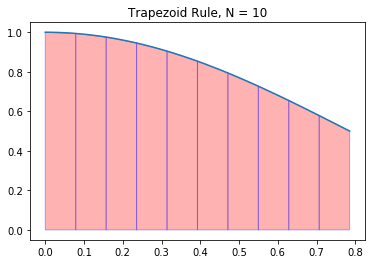

In [15]:
f = lambda x : np.cos(x)**2
a = 0; b = np.pi/4; n = 10
N = 10

x = np.linspace(a,b,N+1)
y = f(x)

X = np.linspace(a,b,n*N+1)
Y = f(X)

plt.plot(X,Y)

for i in range(N):
    xs = [x[i],x[i],x[i+1],x[i+1]]
    ys = [0,f(x[i]),f(x[i+1]),0]
    plt.fill(xs,ys,'r',edgecolor='b',alpha=0.3)

plt.title('Trapezoid Rule, N = {}'.format(N))
plt.show()

Next, let's try

In [16]:
Int_trapz=trapz(f,a,b,N)
Int_trapz

0.6421848282873135

##  Simpson's rule

Let $\{x_{n}\}$ be a partition of $[a,b]$ such that $a=x_{0}<x_{1}<\cdots <x_{N-1}<x_{N}=b$ and $\Delta x_{n}$ be the length of the $k$-th subinterval (that is,$\Delta x_{n}=x_{n}-x_{n-1}$), then

$$ \int _{a}^{b}f(x)\,dx\approx {\tfrac {\Delta x}{3}}\left(f(x_{0})+4f(x_{1})+2f(x_{2})+4f(x_{3})+2f(x_{4})+\cdots +4f(x_{n-1})+f(x_{n})\right).$$

In [17]:
def simps(f,a,b,N):
    # f : single variable function f
    # a , b : Interval of integration [a,b]
    # N : Number of subintervals of [a,b]
     
    # discretizing [a,b] into N subintervals
    # N must be an even integer
    
    if N % 2 == 1:
        raise ValueError("N is not an even integer.")
    # the increment \delta x
    dx = (b-a)/N
    # discretizing [a,b] into N subintervals
    x = np.linspace(a,b,N+1)
    
    fn = f(x)
    S = dx/3 * np.sum(fn[0:-1:2] + 4*fn[1::2] + fn[2::2])
    return S

**Example**: Apply the Simpson Rule on
$$\int_{0}^{1} \exp(-x)\, dx$$


First, let's plot the trapezoids for $f(x)=\exp(x)$ with $N=10$:

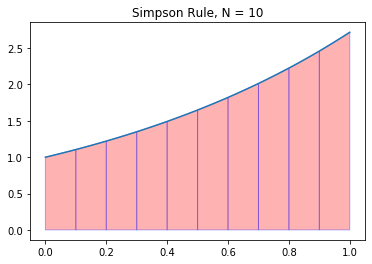

In [18]:
f = lambda x : np.exp(x)
a = 0; b = 1; n = 10
N = 10

x = np.linspace(a,b,N+1)
y = f(x)

X = np.linspace(a,b,n*N+1)
Y = f(X)

plt.plot(X,Y)

for i in range(N):
    xs = [x[i],x[i],x[i+1],x[i+1]]
    ys = [0,f(x[i]),f(x[i+1]),0]
    plt.fill(xs,ys,'r',edgecolor='b',alpha=0.3)

plt.title('Simpson Rule, N = {}'.format(N))
plt.show()

Next, let's try

In [19]:
Int_simps=simps(f,a,b,N)
Int_simps

1.7182827819248234

## Midpoint Rule

Let $\{x_{n}\}$ be a partition of $[a,b]$ such that $a=x_{0}<x_{1}<\cdots <x_{N-1}<x_{N}=b$ and $\Delta x_{n}$ be the length of the $k$-th subinterval (that is,$\Delta x_{n}=x_{n}-x_{n-1}$), then

$$\int_{{\,a}}^{{\,b}}{{f\left( x \right)\,dx}} \approx \Delta x\,f\left( {x_1^*} \right) + \Delta x\,f\left( {x_2^*} \right) +  \cdots  + \Delta x\,f\left( {x_n^*} \right),$$

where $x_{i}^{*}$ are the midpoint of the intervals. 

In [20]:
def Midpoint(f,a,b,N):
    # f : single variable function f
    # a , b : Interval of integration [a,b]
    # N : Number of subintervals of [a,b]
     
    # discretizing [a,b] into N subintervals
    x = np.linspace(0,1,N+1)
    # midpoints
    xs=(x[1:N]+x[2:N+1])/2
    # discretizing function f on [a,b]
    fn = f(xs)
    # the increment \delta x
    dx = (b - a)/N
    ### Trapezoidal rule
    M = dx * np.sum(fn)
    return M

**Example**: Apply the Midpoint Rule on
$$\int_{0}^{1} x^2\, dx$$


First, let's plot the trapezoids for $f(x)=x^2$ with $N=10$:

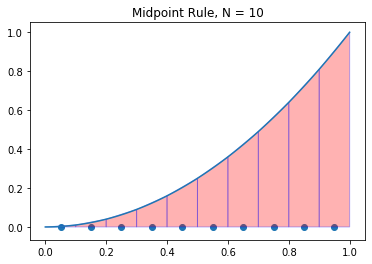

In [30]:
f = lambda x : x**2
a = 0; b = 1; n = 10
N = 10

x = np.linspace(a,b,N+1)
y = f(x)

X = np.linspace(a,b,n*N+1)
Y = f(X)

plt.plot(X,Y)

# midpoints
xmid=(x[0:N]+x[1:N+1])/2

for i in range(N):
    xs = [x[i],x[i],x[i+1],x[i+1]]
    ys = [0,f(x[i]),f(x[i+1]),0]
    plt.fill(xs,ys,'r',edgecolor='b',alpha=0.3)
    
plt.scatter(xmid,np.zeros(len(xmid)))

plt.title('Midpoint Rule, N = {}'.format(N))
plt.show()

Next, let's try

In [31]:
Int_Midpoint=Midpoint(f,a,b,N)
Int_Midpoint

0.33225000000000005

## The n-point Gauss integration rule

Gaussian quadrature rule:

$$\int _{a}^{b}f(x)\,dx\approx {\frac {b-a}{2}}\sum _{i=1}^{n}w_{i}f\left({\frac {b-a}{2}}x_{i}+{\frac {a+b}{2}}\right).$$

In [57]:
def gauss(f,a,b,n):
    # f : single variable function f
    # a , b : Interval of integration [a,b]
    # n : n-point Gauss integration rule

    [x,w] = p_roots(n+1)
    G=0.5*(b-a)*sum(w*f(0.5*(b-a)*x+0.5*(b+a)))
    return G

**Example**: Let's consider the previous example one more time
$$\int_{0}^{1} x^2\, dx$$
Then

In [58]:
f = lambda x : x**2
a = 0; b = 1; n = 10

gauss(f,a,b,n)

0.3333333333333335